In [5]:
!pip install prophet pysan


  Using cached holidays-0.77-py3-none-any.whl.metadata (46 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 4.2 MB/s  0:00:02 eta 0:00:01
Using cached holidays-0.77-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [prophet]m5/6 [prophet]]


In [6]:
import pandas as pd
import prophet 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('/Users/orbinsunny/Documents/GitHub/Machine_Learning/Time_Series_Analysis/WEEK1/datasets/airline_passengers.csv')

In [9]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [10]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [11]:
df = df[:-1]

In [12]:
df.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


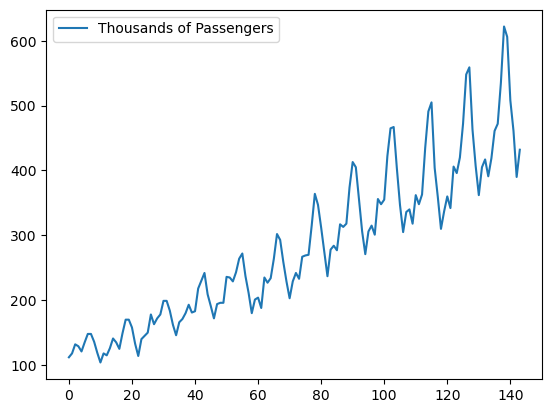

In [15]:
df.plot()
plt.show();

In [16]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [17]:
df['ds'] = pd.to_datetime(df['ds'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [20]:
from prophet import Prophet

dir(Prophet)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 

In [21]:
# Initialize the Model
model = Prophet()
df.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model.fit(df)


09:33:22 - cmdstanpy - INFO - Chain [1] start processing
09:33:23 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [24]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [25]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)
prediction= model.predict(future_dates)

In [26]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [27]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.776428,58.185288,112.899873,107.776428,107.776428,-21.362581,-21.362581,-21.362581,-21.362581,-21.362581,-21.362581,0.0,0.0,0.0,86.413847
1,1949-02-01,109.911280,49.060209,108.298907,109.911280,109.911280,-30.015161,-30.015161,-30.015161,-30.015161,-30.015161,-30.015161,0.0,0.0,0.0,79.896119
2,1949-03-01,111.839534,82.948462,139.265083,111.839534,111.839534,-0.474648,-0.474648,-0.474648,-0.474648,-0.474648,-0.474648,0.0,0.0,0.0,111.364886
3,1949-04-01,113.974386,79.723753,136.215484,113.974386,113.974386,-4.908798,-4.908798,-4.908798,-4.908798,-4.908798,-4.908798,0.0,0.0,0.0,109.065588
4,1949-05-01,116.040373,84.143547,140.777309,116.040373,116.040373,-3.609899,-3.609899,-3.609899,-3.609899,-3.609899,-3.609899,0.0,0.0,0.0,112.430473


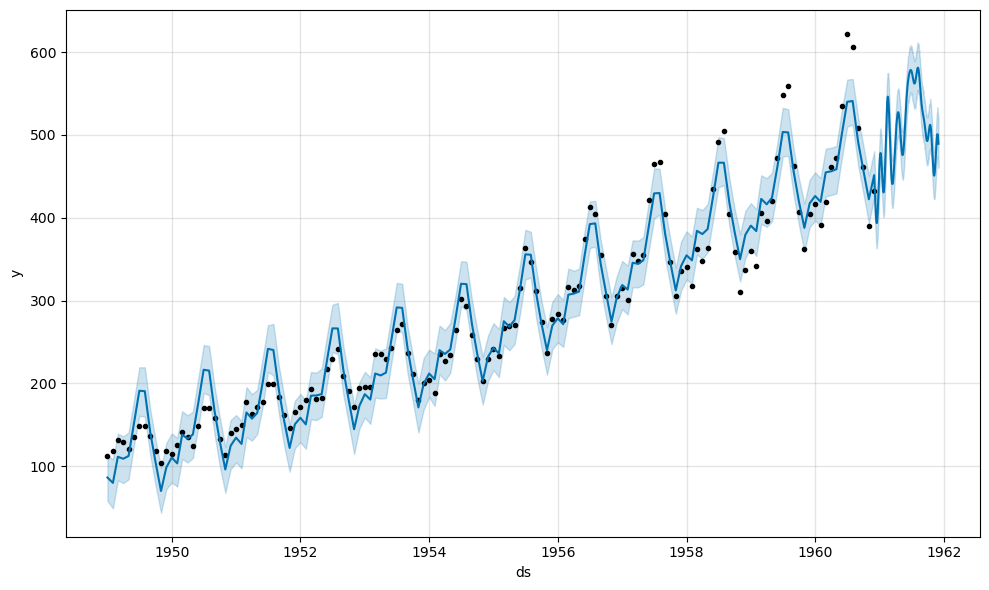

In [30]:
model.plot(prediction)
plt.show();

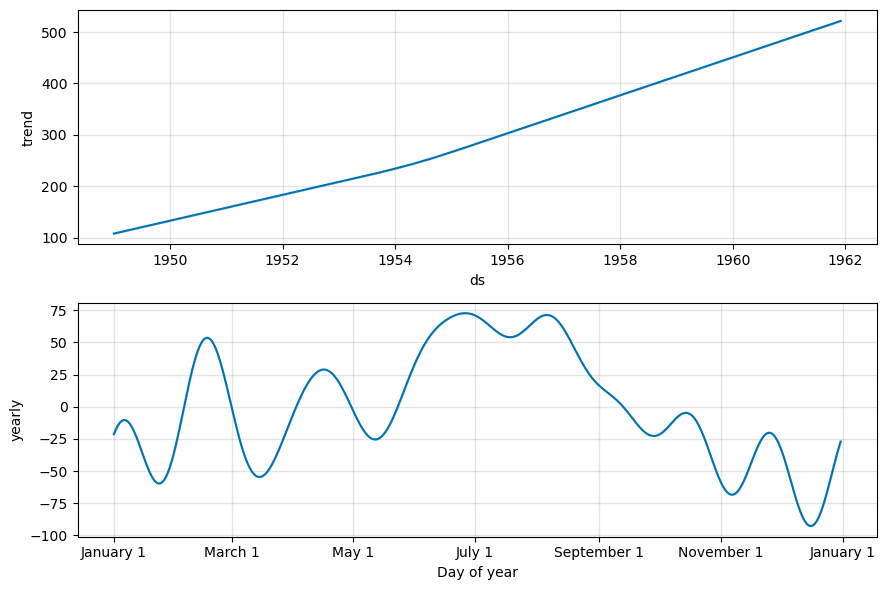

In [31]:
model.plot_components(prediction)

Time Series Analysis - Cross validation 

* 1960 - 1961 - Train set
* 1961 - 1962 - Test set
* 1962 - 1963 - Validation set

In [32]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]

12:09:34 - cmdstanpy - INFO - Chain [1] start processing
12:09:46 - cmdstanpy - INFO - Chain [1] done processing
12:09:46 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing
12:09:47 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing
12:09:47 - cmdstanpy - INFO - Chain [1] start processing
12:09:47 - cmdstanpy - INFO - Chain [1] done processing
12:09:48 - cmdstanpy - INFO - Chain [1] start processing
12:09:48 - cmdstanpy - INFO - Chain [1] done processing
12:09:48 - cmdstanpy - INFO - Chain [1] start processing
12:09:48 - cmdstanpy - INFO - Chain [1] done processing
12:09:48 - cmdstanpy - INFO - Chain [1] start processing
12:09:49 - cmdstanpy - INFO - Chain [1] done processing
12:09:49 - cmdstanpy - INFO - Chain [1] start processing
12:09:49 - cmdstanpy - INFO - Chain [1] done processing
12:09:49 - cmdstanpy - INFO - Chain [1] start processing
12:09:49 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.224549,156.932808,157.532235,150.0,1951-01-18
1,1951-03-01,169.122714,168.177935,170.092138,178.0,1951-01-18
2,1951-04-01,156.504735,154.645756,158.353190,163.0,1951-01-18
3,1951-05-01,142.204381,139.135086,145.110290,172.0,1951-01-18
4,1951-06-01,176.070428,171.803529,180.188991,178.0,1951-01-18


In [34]:
df_cv.shape

(228, 6)

In [33]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.996361,32.954459,25.802013,0.078130,0.073928,0.079188,0.227273
1,42 days,1013.218091,31.831087,25.248620,0.076989,0.073928,0.077721,0.181818
2,46 days,907.957456,30.132332,24.663440,0.078842,0.078980,0.078630,0.136364
3,47 days,1043.721662,32.306681,26.840833,0.082018,0.085537,0.082195,0.136364
4,48 days,1033.331185,32.145469,26.297951,0.080148,0.085537,0.080390,0.181818


In [35]:
df_p.shape

(170, 8)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


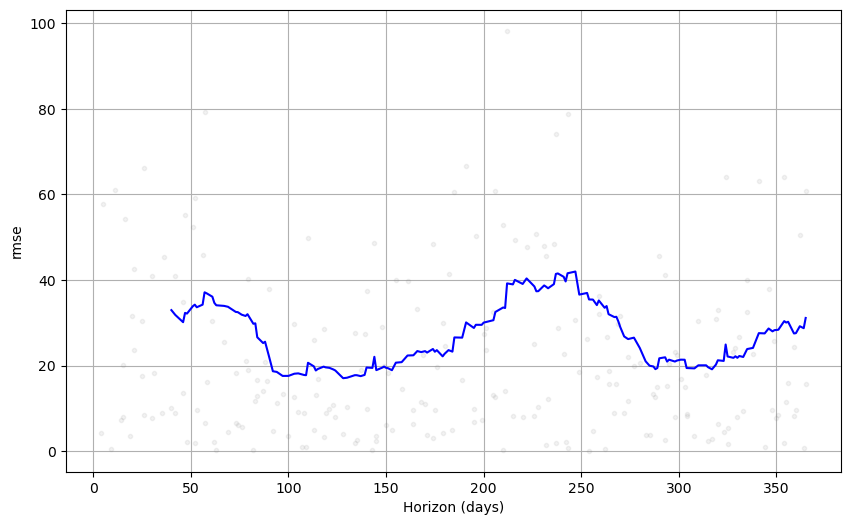

In [38]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show();

In [41]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df = pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [43]:
df = df[:-1]

In [44]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


### Steps 
1. Introduciton and Installation
2. Data preprocessing with time series
3. Model Fitting
4. Obtaining the Forecasts
5. Plotting the Forecasts
6. Cross Validation
7. Computing Performance Metrics
8. Visualize the PM
9. Conclusions

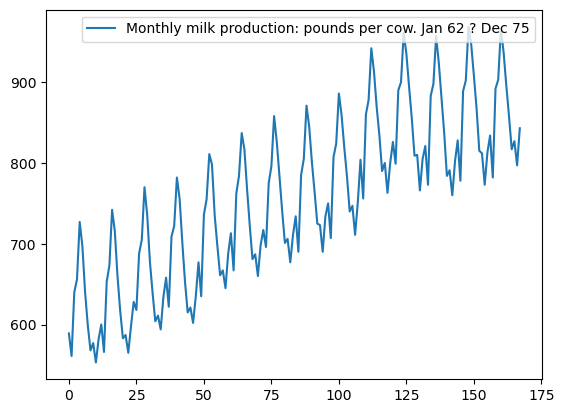

In [47]:
df.plot()
plt.show();

In [48]:
df.columns = ['ds', 'y']

In [49]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [50]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [51]:
df['y'] = df['y']-df['y'].shift(1)
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


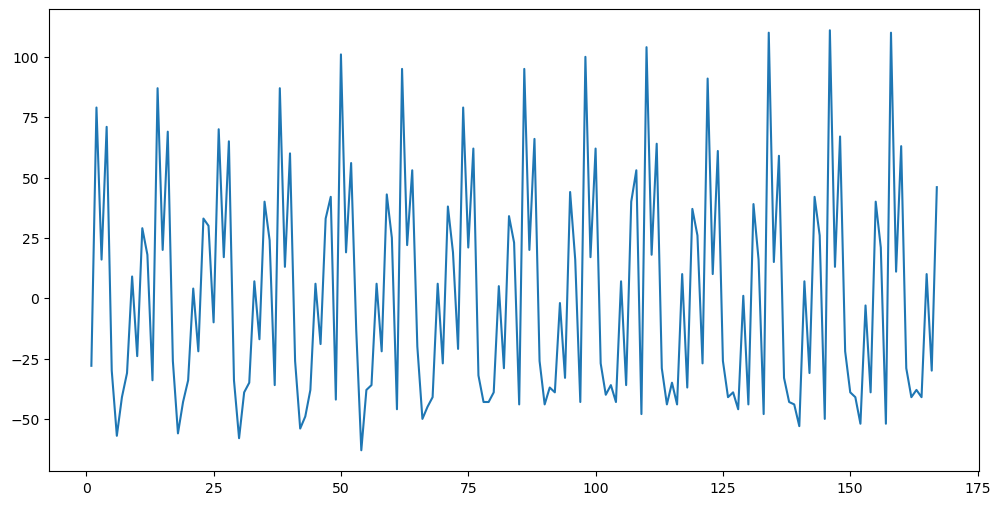

In [54]:
df['y'].plot(figsize=(12, 6))
plt.show();

In [55]:
from prophet import Prophet

# Initialize the Model
model = Prophet()
model.fit(df)

10:20:15 - cmdstanpy - INFO - Chain [1] start processing
10:20:15 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
# create future dates of 365 days
future_dates = model.make_future_dataframe(periods=365)
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [57]:
# Prediction
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,1.979161,17.195643,36.679796,1.979161,1.979161,24.988753,24.988753,24.988753,24.988753,24.988753,24.988753,0.0,0.0,0.0,26.967914
1,1962-02-01,1.977110,-48.299521,-28.698573,1.977110,1.977110,-40.260216,-40.260216,-40.260216,-40.260216,-40.260216,-40.260216,0.0,0.0,0.0,-38.283106
2,1962-03-01,1.975257,85.983438,104.603165,1.975257,1.975257,93.021280,93.021280,93.021280,93.021280,93.021280,93.021280,0.0,0.0,0.0,94.996537
3,1962-04-01,1.973207,6.766249,25.569648,1.973207,1.973207,14.326011,14.326011,14.326011,14.326011,14.326011,14.326011,0.0,0.0,0.0,16.299217
4,1962-05-01,1.971222,52.391854,71.466670,1.971222,1.971222,60.545888,60.545888,60.545888,60.545888,60.545888,60.545888,0.0,0.0,0.0,62.517110


In [58]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,12.966114,2.896389,22.104331
529,1976-11-27,18.420174,9.402546,28.022136
530,1976-11-28,24.008445,14.853813,33.047335
531,1976-11-29,29.618238,20.700605,39.538124
532,1976-11-30,35.130953,25.563760,43.665707


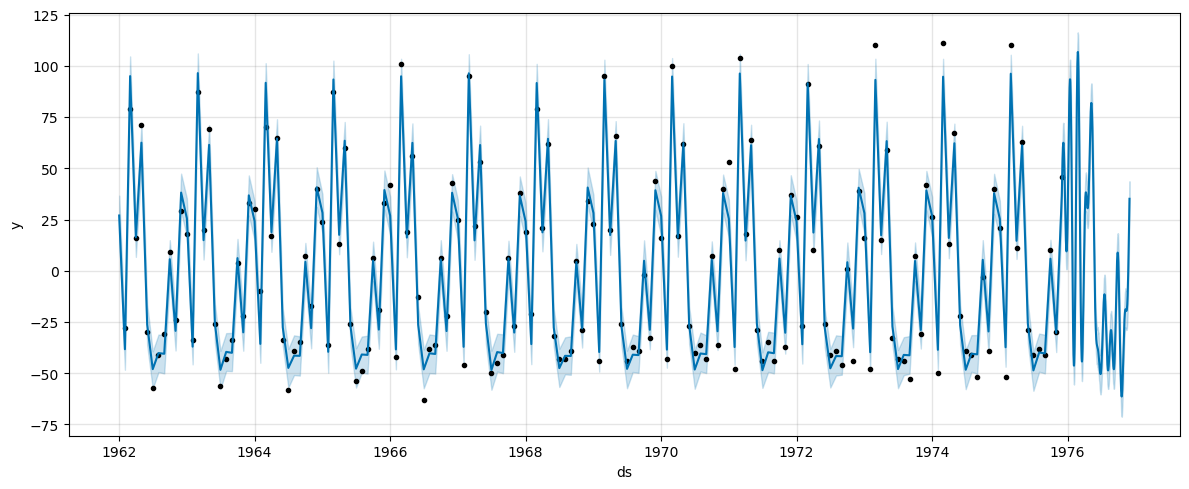

In [61]:
model.plot(prediction, figsize=(12, 5))

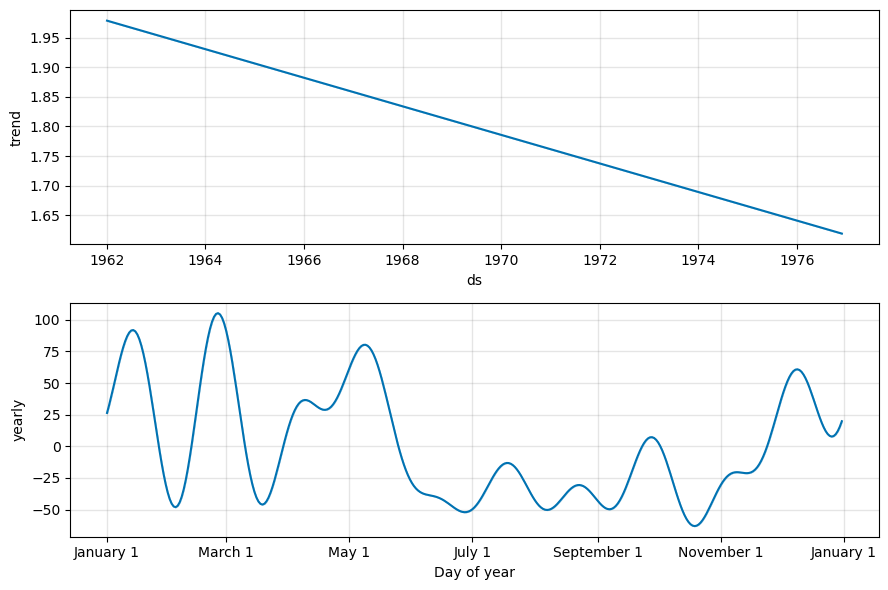

In [62]:
model.plot_components(prediction)

In [63]:
df_cross_validation = cross_validation(model, horizon="365 days", period="180 days", initial="1095 days")

  0%|          | 0/20 [00:00<?, ?it/s]

10:45:54 - cmdstanpy - INFO - Chain [1] start processing
10:45:55 - cmdstanpy - INFO - Chain [1] done processing
10:45:55 - cmdstanpy - INFO - Chain [1] start processing
10:45:55 - cmdstanpy - INFO - Chain [1] done processing
10:45:56 - cmdstanpy - INFO - Chain [1] start processing
10:45:56 - cmdstanpy - INFO - Chain [1] done processing
10:45:56 - cmdstanpy - INFO - Chain [1] start processing
10:45:57 - cmdstanpy - INFO - Chain [1] done processing
10:45:57 - cmdstanpy - INFO - Chain [1] start processing
10:45:57 - cmdstanpy - INFO - Chain [1] done processing
10:45:57 - cmdstanpy - INFO - Chain [1] start processing
10:45:57 - cmdstanpy - INFO - Chain [1] done processing
10:45:58 - cmdstanpy - INFO - Chain [1] start processing
10:45:58 - cmdstanpy - INFO - Chain [1] done processing
10:45:58 - cmdstanpy - INFO - Chain [1] start processing
10:45:58 - cmdstanpy - INFO - Chain [1] done processing
10:45:59 - cmdstanpy - INFO - Chain [1] start processing
10:45:59 - cmdstanpy - INFO - Chain [1]

In [64]:
df_cross_validation.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898333,-46.409680,-35.275544,-49.0,1965-07-21
1,1965-09-01,-34.869403,-40.614741,-29.468261,-38.0,1965-07-21
2,1965-10-01,6.103185,0.368194,11.669908,6.0,1965-07-21
3,1965-11-01,-20.281447,-25.764116,-14.857944,-19.0,1965-07-21
4,1965-12-01,36.035424,30.412970,41.429165,33.0,1965-07-21


In [65]:
# performance metrics
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1085.996361,32.954459,25.802013,0.078130,0.073928,0.079188,0.227273
1,42 days,1013.218091,31.831087,25.248620,0.076989,0.073928,0.077721,0.181818
2,46 days,907.957456,30.132332,24.663440,0.078842,0.078980,0.078630,0.136364
3,47 days,1043.721662,32.306681,26.840833,0.082018,0.085537,0.082195,0.136364
4,48 days,1033.331185,32.145469,26.297951,0.080148,0.085537,0.080390,0.181818


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


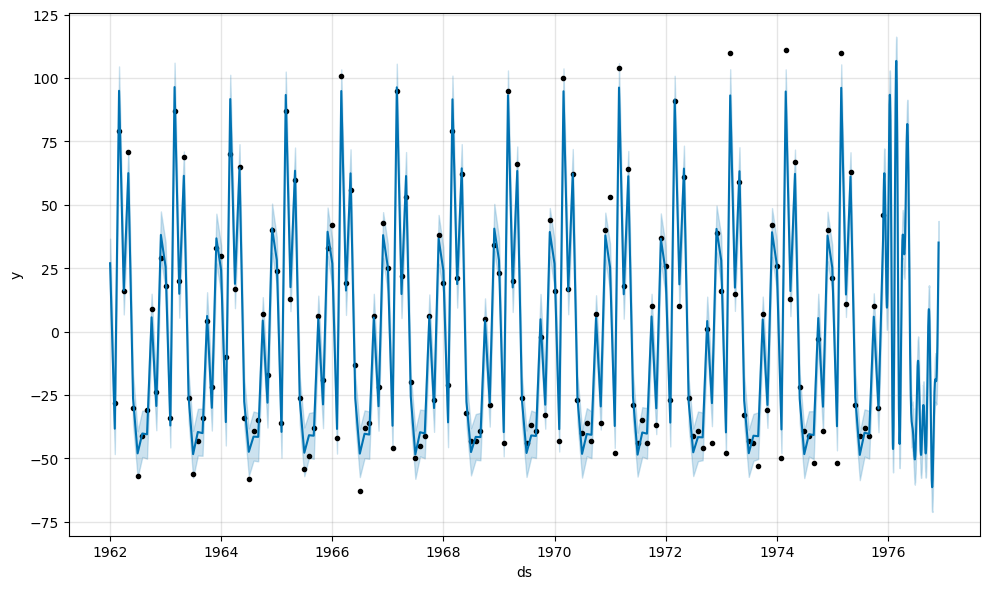

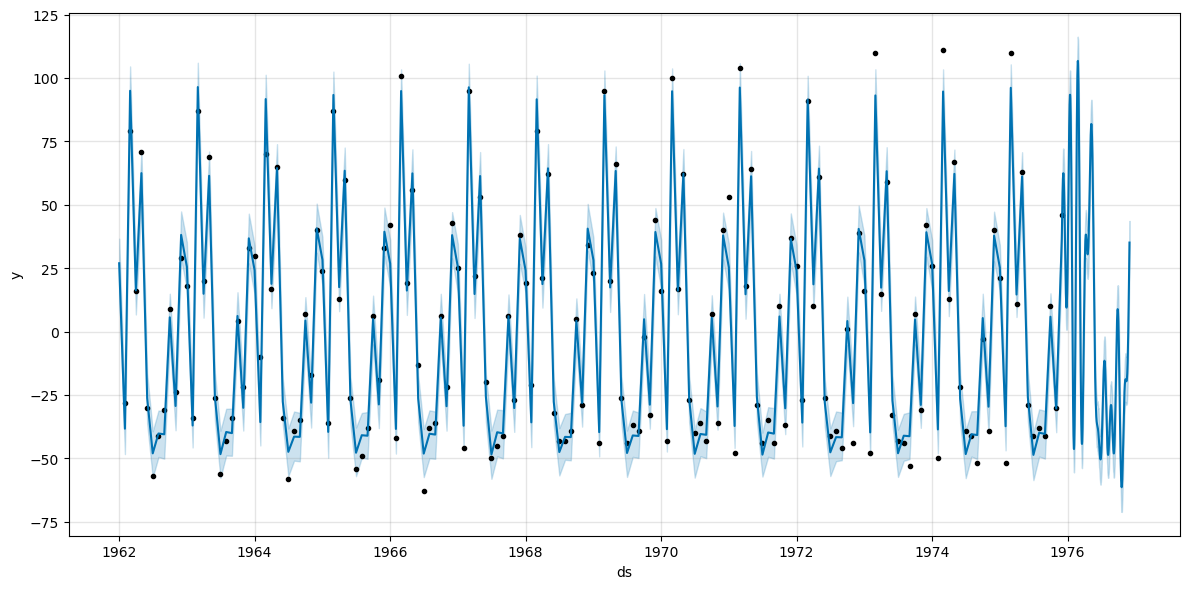

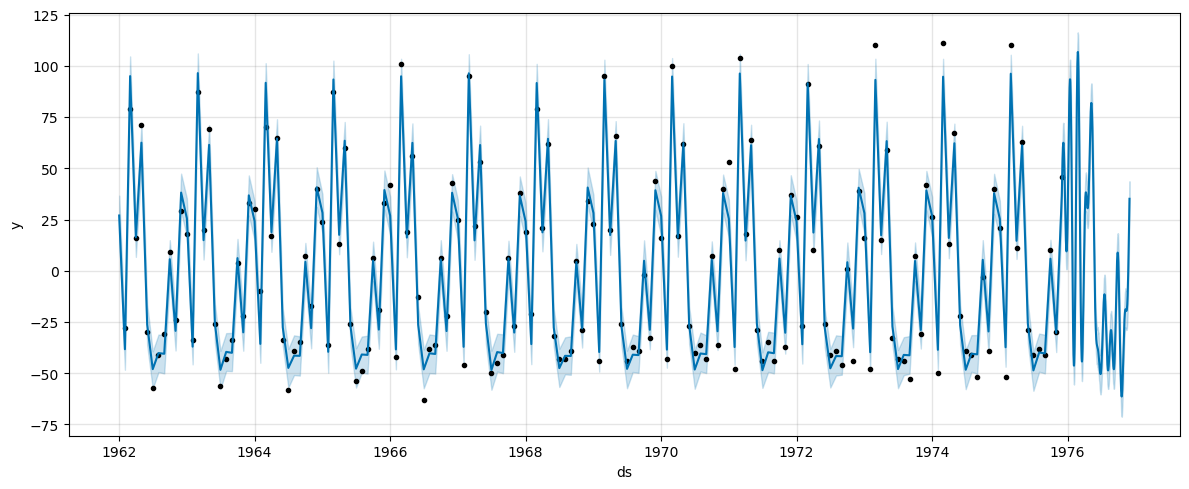

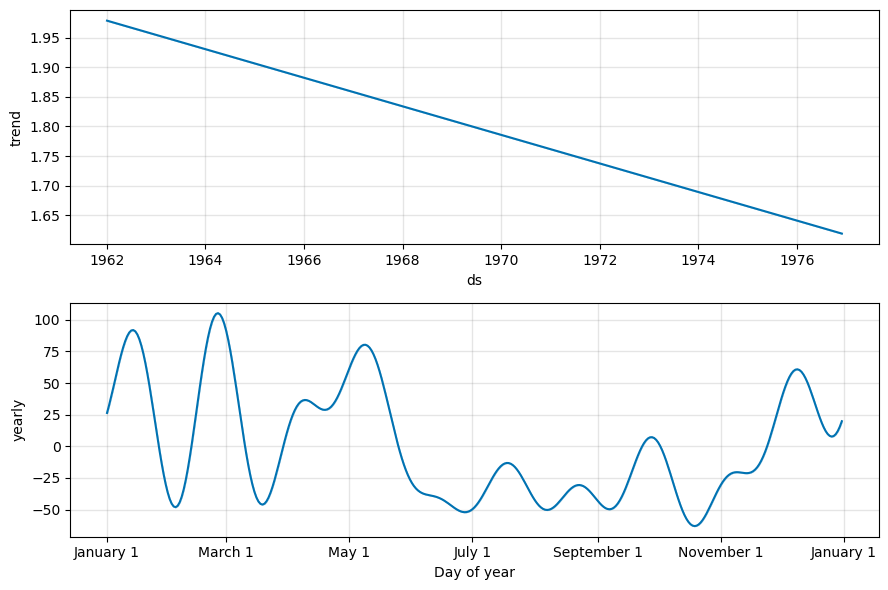

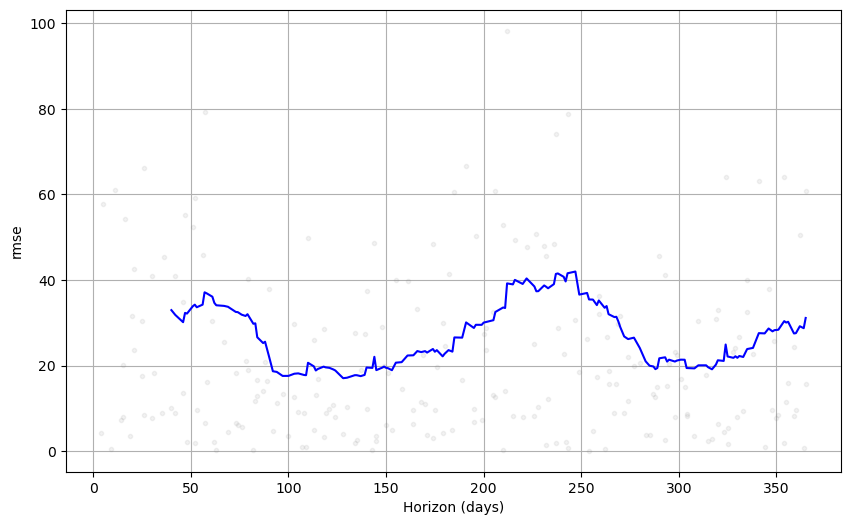

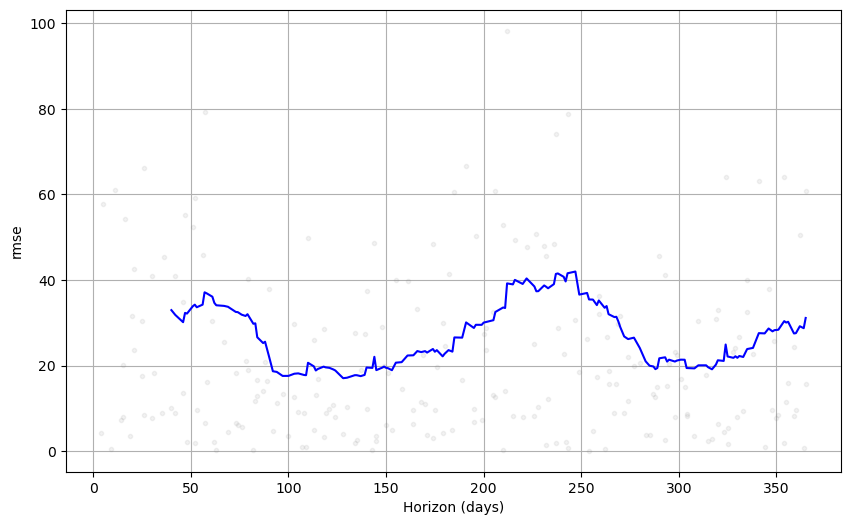

In [67]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()